In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys
from scipy.optimize import curve_fit

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
sys.path.append("../AnalysisTools/")
import Dataset
import AnalysisTools

In [2]:
toproot = "/p/lustre2/nexouser/data/StanfordData/angelico/hv-test-chamber/"
topdirs = {5:toproot+"Run5/", 6:toproot+"Run6/", 7:toproot+"Run7/", 8:toproot+"Run8/", 9:toproot+"Run9/"}
configs = {5:"../configs/run5_config.yaml", 6:"../configs/run6_config.yaml", 7:"../configs/run7_config.yaml", 8:"../configs/run8_config.yaml", 9:"../configs/run9_config.yaml"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n])


In [3]:
#load data into mem if you want
for n, ana in anas.items():
    if(n != 9): continue
    ana.load_dataframe()

125


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


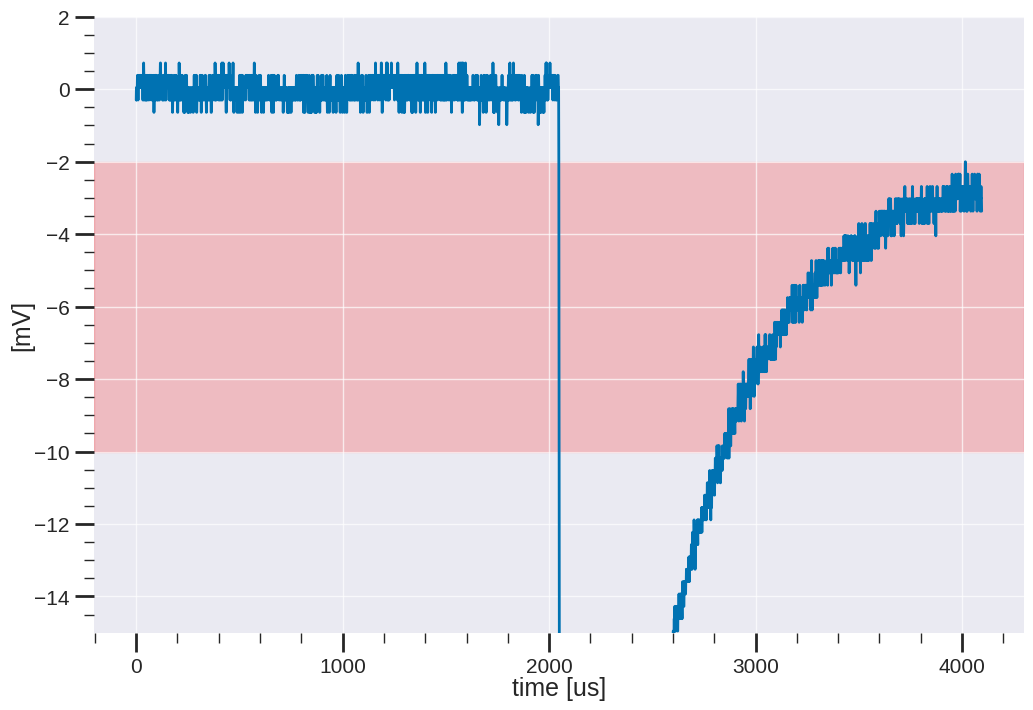

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


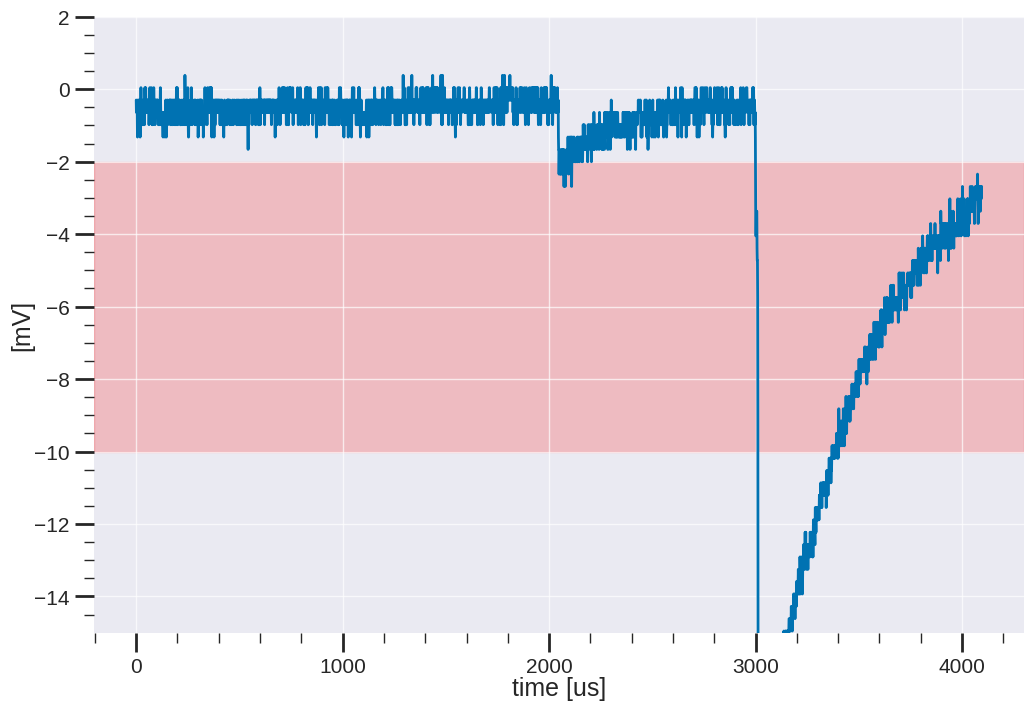

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


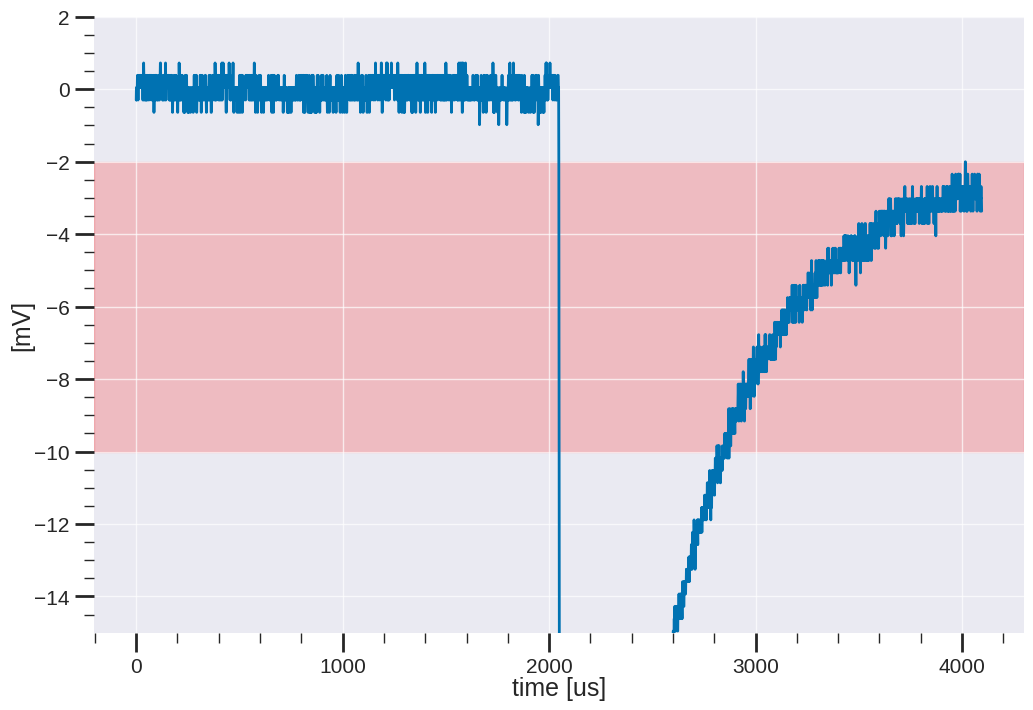

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


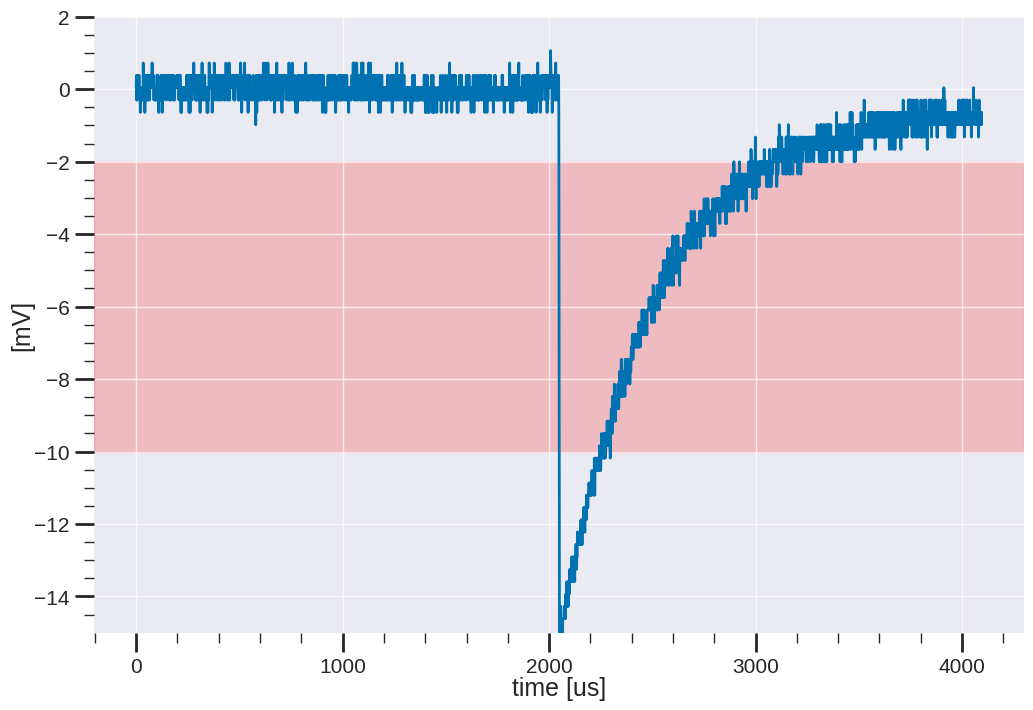

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


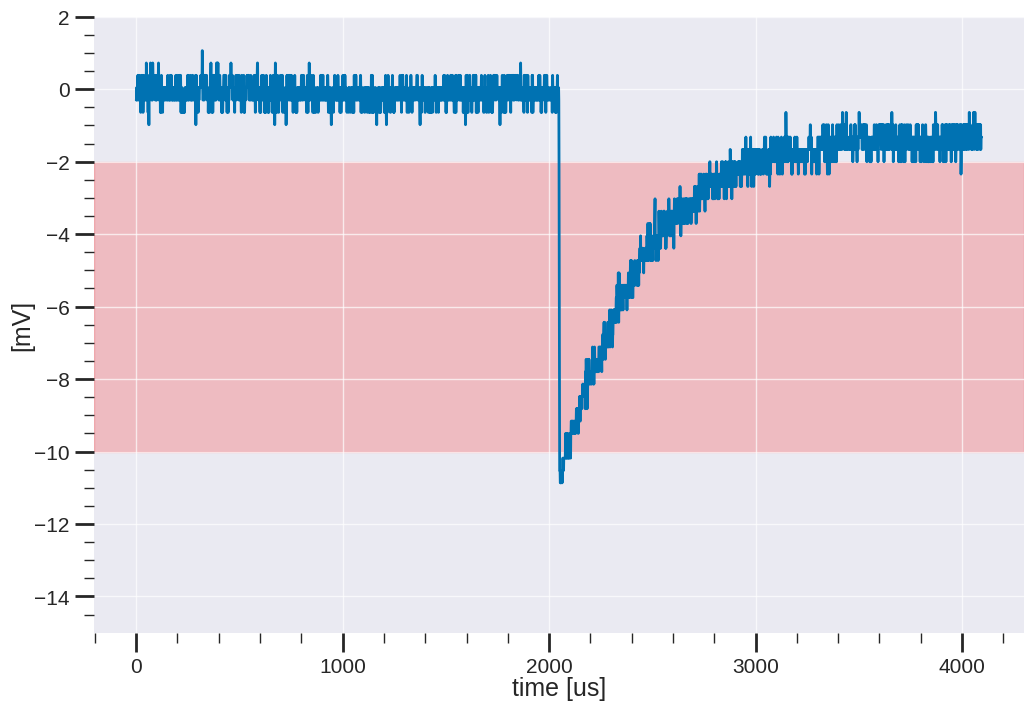

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


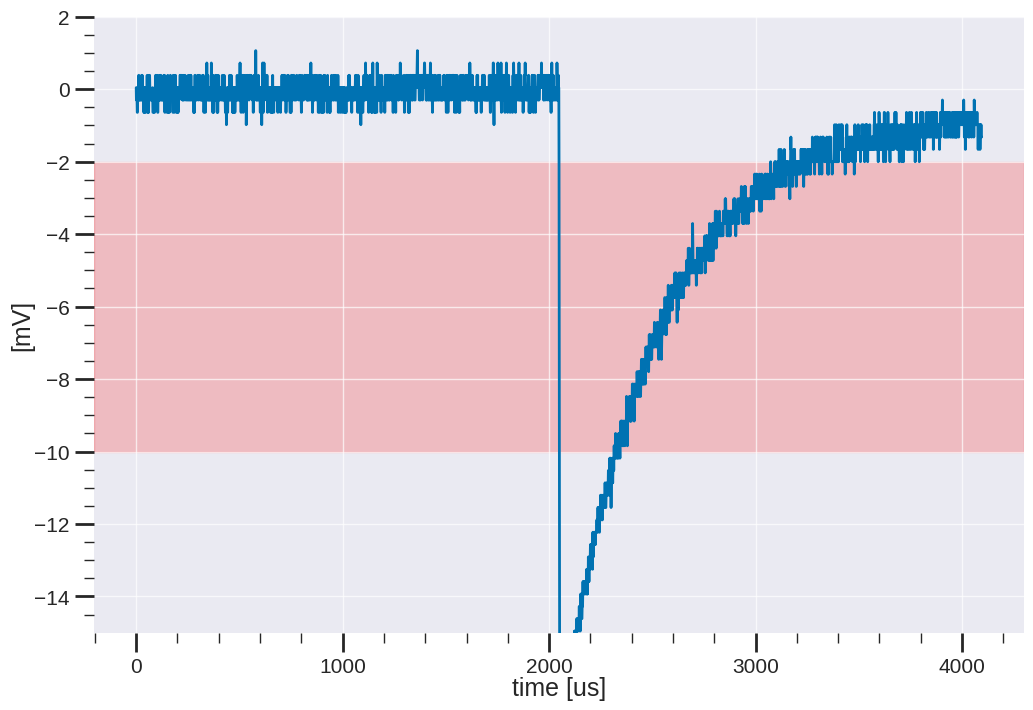

In [13]:
#waveform plotting tool (not tested, need cluster where all prereduced data sits. )
#for run, ana in anas.items():
d = anas[9].df
d = d[~d["ch3 charge"].isna()]
#timesearch = datetime.timestamp(datetime(2023, 10, 4, 17, 53, 0))
mask = (d["ch3 amp"] < -2) & (d["ch3 amp"] < -10)
sw_chs = [3]
dd = d[mask]
print(len(dd.index))

#events = ana.get_waveforms_from_cuts(mask, sw_chs)[3]
events = ana.get_waveforms_from_df(dd, sw_chs)[3]
n = 6
idxs = np.random.choice(range(len(events)), n)
for i in idxs:
    ev = events[i]
    fig, ax = plt.subplots()
    ax.plot(range(len(ev["Data"])), ev["Data"])
    ax.axhspan(-2, -10, alpha=0.2, color='red')
    ax.legend()
    ax.set_xlabel("time [us]")
    ax.set_ylabel('[mV]')
    #ax.set_title("charge: {:.2f} pC, amp: {:.1f} mV, energy: {:.1f} pJ, hv: {:.1f} kV".format()
    ax.set_ylim([-15, 2])
    plt.show()